In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def get_q_star(q_star):
    return q_star + np.random.normal(scale=0.01, size=len(q_star)) 

In [18]:
def sample_avgs_run(n_arms, T, Q, q_star, epsilon):
    n = np.zeros(n_arms)
    avg_rwd = np.zeros(T)
    best_action = np.zeros(T)
    for i in range(T):
        # Pick an action
        if np.random.uniform() >= epsilon:
            A = np.argmax(Q)
        else:
            A = np.random.choice(np.arange(n_arms))

        # Get a reward
        R = np.random.normal(q_star[A])
        
        # Update Q
        n[A] = n[A] + 1               # Number of times this action has been taken
        Q[A] = Q[A] + (R - Q[A])/n[A] # Incremental implementation

        avg_rwd[i] = R
        best_action[i] = (A == np.argmax(q_star))
        
        # Simulate nonstationary q_star
        q_star = get_q_star(q_star)
    return avg_rwd, best_action

In [25]:
def const_step_size_run(n_arms, T, Q, q_star, epsilon, alpha=0.1):
    avg_rwd = np.zeros(T)
    best_action = np.zeros(T)
    for i in range(T):
        # Pick an action
        if np.random.uniform() >= epsilon:
            A = np.argmax(Q)
        else:
            A = np.random.choice(np.arange(n_arms))

        # Get a reward
        R = np.random.normal(q_star[A])
        
        # Update Q
        Q[A] = Q[A] + alpha*(R - Q[A]) # Incremental implementation

        avg_rwd[i] = R
        best_action[i] = (A == np.argmax(q_star))
        
        # Simulate nonstationary q_star
        q_star = get_q_star(q_star)
    return avg_rwd, best_action

In [30]:
def avg_behavior(epsilon, run_func):
    iterations = 2000
    T = 10_000
    n_arms = 10
    rewards = np.zeros((iterations, T))
    best_actions = np.zeros((iterations, T))
    for i in range(iterations):
        Q = np.zeros(n_arms)
        q_star = np.zeros(n_arms)
        results = run_func(n_arms, T, Q, q_star, epsilon)
        rewards[i, :] = results[0]
        best_actions[i, :] = results[1]
    return np.mean(rewards, axis=0), np.mean(best_actions, axis=0)

In [31]:
methods = [sample_avgs_run, const_step_size_run]
avg_rewards = []
avg_best_actions = []
for m in methods:
    r, ba = avg_behavior(0.1, m)
    avg_rewards.append(r)
    avg_best_actions.append(ba)

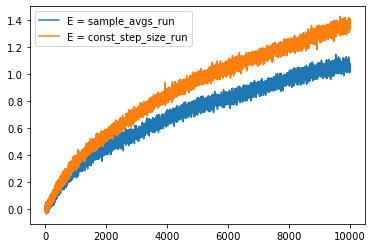

In [32]:
fig = plt.figure()
for i, method in enumerate(methods):
    plt.plot(avg_rewards[i], label=f"E = {method.__name__}")
plt.legend()
plt.show()

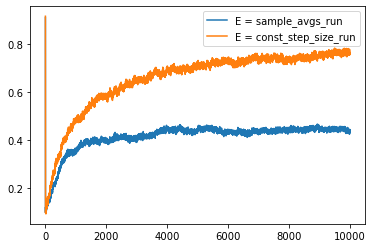

In [34]:
fig2 = plt.figure()
for i, method in enumerate(methods):
    plt.plot(avg_best_actions[i], label=f"E = {method.__name__}")
plt.legend()
plt.show()